In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv',index_col = 'id')
test = pd.read_csv('testA.csv',index_col = 'id')
#label = train.pop('isDefault')



In [5]:
import pandas_profiling as pp
report = pp.ProfileReport(train)
report.profile_report(title='Train data report').to_file('Data.html')

Summarize dataset:  82%|████████▏ | 47/57 [00:50<00:02,  4.47it/s, Calculate spearman correlation]      

In [30]:
train['employmentLength'].value_counts()
train['employmentLength'].isnull().value_counts()

False    753201
True      46799
Name: employmentLength, dtype: int64

In [3]:
print('Train data shape:',train.shape)
print('Test data shape:', test.shape)
train.head()
print(train.info())
#print(train.describe())


Train data shape: (800000, 46)
Test data shape: (200000, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799

In [4]:
numerical_feature = list(train.select_dtypes(exclude=['object']).columns)
category_feature = list(filter(lambda x: x not in numerical_feature,list(train.columns)))
category_feature = list(filter(lambda x: x not in numerical_feature, list(train.columns)))

#数值类型
print("numerical_feature: ", numerical_feature)

#对象类型
print("category_feature: ", category_feature)

numerical_feature:  ['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
category_feature:  ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


In [5]:
numerical_feature.pop(8)
print("numerical_feature: ", numerical_feature)

numerical_feature:  ['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [6]:
#连续变量
serial_feature = []
#离散变量
discrete_feature = []
#单值变量
unique_feature = []

for feature in numerical_feature:
    temp = train[feature].nunique()
    #print(feature," : ",temp)
    if temp == 1:
        unique_feature.append(feature)
    elif temp < 20:
        discrete_feature.append(feature)
    else :
        serial_feature.append(feature)

print("连续变量 ",serial_feature)
print("离散变量 ",discrete_feature)
print("单值变量 ",unique_feature)

连续变量  ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
离散变量  ['term', 'homeOwnership', 'verificationStatus', 'purpose', 'pubRecBankruptcies', 'initialListStatus', 'applicationType', 'n11', 'n12']
单值变量  ['policyCode']


In [7]:
print("重复值：",train.duplicated().sum())
print("缺失值：",train.isnull().any().sum())
# 缺失数量和百分比
null_cnt = np.sum(train.isnull())
null_ratio = null_cnt / train.shape[0] *100
#pd.DataFrame({'null_cnt':null_cnt, 'null_ratio':null_ratio})

重复值： 0
缺失值： 22


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'feature term value overview')

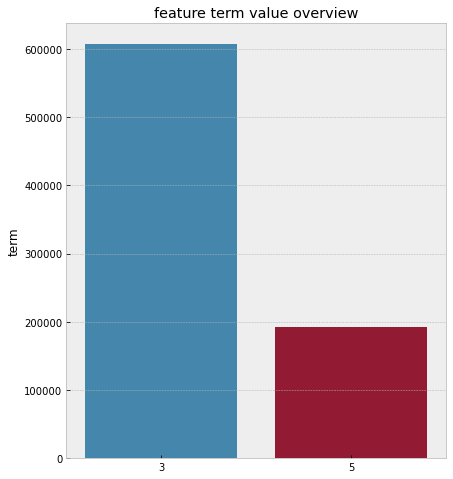

In [8]:
train['term'].value_counts()
# 可视化
plt.style.use('bmh')
plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.barplot(train["term"].value_counts(dropna=False).keys(),
            train["term"].value_counts(dropna=False)
            )
plt.title('feature term value overview')

<AxesSubplot:>

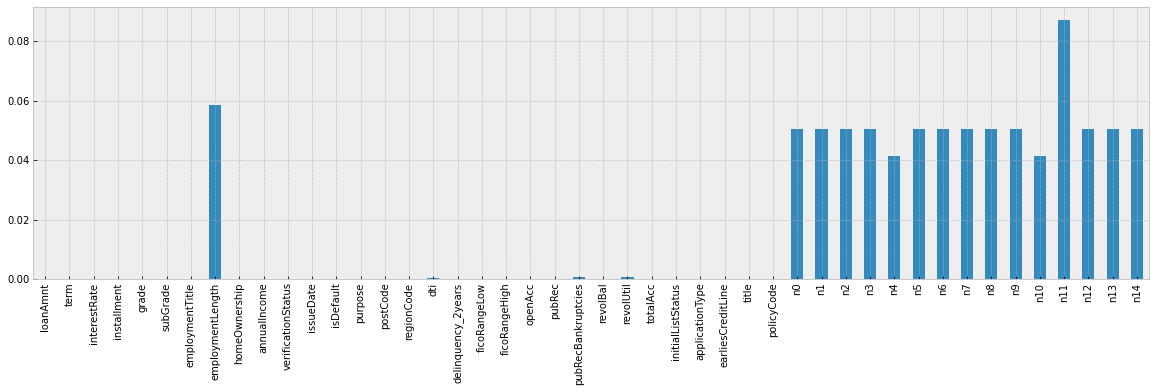

In [9]:
# 可视化
#(train.isnull().sum()/len(train)).plot.bar(figsize = (20,6))

(train.isnull().sum() / len(train)).plot.bar(figsize = (20,5))

In [10]:
train['employmentLength'].isnull().sum()
train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./example.html")

In [11]:
from sklearn.impute import SimpleImputer

#数值型特征中位数填补(测试集也用训练集数据填补)
train[numerical_feature] = train[numerical_feature].fillna(train[numerical_feature].median())
test[numerical_feature] = test[numerical_feature].fillna(train[numerical_feature].median())

#类别型特征众数填补
train[category_feature] = train[category_feature].fillna(train[category_feature].mode())
test[category_feature] = test[category_feature].fillna(train[category_feature].mode())

In [12]:
from sklearn.model_selection import StratifiedKFold
#平均编码类定义
class MeanEncoder:
    def __init__(self, categorical_features, n_splits=5, target_type='classification', prior_weight_func=None):
        """
        :param categorical_features: list of str, the name of the categorical columns to encode

        :param n_splits: the number of splits used in mean encoding

        :param target_type: str, 'regression' or 'classification'

        :param prior_weight_func:
        a function that takes in the number of observations, and outputs prior weight
        when a dict is passed, the default exponential decay function will be used:
        k: the number of observations needed for the posterior to be weighted equally as the prior
        f: larger f --> smaller slope
        """

        self.categorical_features = categorical_features
        self.n_splits = n_splits
        self.learned_stats = {
   
   }

        if target_type == 'classification':
            self.target_type = target_type
            self.target_values = []
        else:
            self.target_type = 'regression'
            self.target_values = None

        if isinstance(prior_weight_func, dict):
            self.prior_weight_func = eval('lambda x: 1 / (1 + np.exp((x - k) / f))', dict(prior_weight_func, np=np))
        elif callable(prior_weight_func):
            self.prior_weight_func = prior_weight_func
        else:
            self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))

    @staticmethod
    def mean_encode_subroutine(X_train, y_train, X_test, variable, target, prior_weight_func):
        X_train = X_train[[variable]].copy()
        X_test = X_test[[variable]].copy()

        if target is not None:
            nf_name = '{}_pred_{}'.format(variable, target)
            X_train['pred_temp'] = (y_train == target).astype(int)  # classification
        else:
            nf_name = '{}_pred'.format(variable)
            X_train['pred_temp'] = y_train  # regression
        prior = X_train['pred_temp'].mean()

        col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({
   
   'mean': 'mean', 'beta': 'size'})
        col_avg_y['beta'] = prior_weight_func(col_avg_y['beta'])
        col_avg_y[nf_name] = col_avg_y['beta'] * prior + (1 - col_avg_y['beta']) * col_avg_y['mean']
        col_avg_y.drop(['beta', 'mean'], axis=1, inplace=True)

        nf_train = X_train.join(col_avg_y, on=variable)[nf_name].values
        nf_test = X_test.join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name].values

        return nf_train, nf_test, prior, col_avg_y

    def fit_transform(self, X, y):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :param y: pandas Series or numpy array, n_samples
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
        if self.target_type == 'classification':
            skf = StratifiedKFold(self.n_splits)
        else:
            skf = KFold(self.n_splits)

        if self.target_type == 'classification':
            self.target_values = sorted(set(y))
            self.learned_stats = {
   
   '{}_pred_{}'.format(variable, target): [] for variable, target in
                                  product(self.categorical_features, self.target_values)}
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, target,
                        self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        else:
            self.learned_stats = {
   
   '{}_pred'.format(variable): [] for variable in self.categorical_features}
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, None,
                        self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        return X_new

    def transform(self, X):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()

        if self.target_type == 'classification':
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                        nf_name]
                X_new[nf_name] /= self.n_splits
        else:
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                        nf_name]
                X_new[nf_name] /= self.n_splits

        return X_new

In [13]:
class_list = ['postCode', 'purpose', 'regionCode', 'grade', 'subGrade', 'homeOwnership', 'employmentTitle','title']
MeanEnocodeFeature = class_list  # 声明需要平均数编码的特征
ME = MeanEncoder(MeanEnocodeFeature, target_type='classification')  # 声明平均数编码的类

In [14]:


#target encoder 目标编码代码容易造成过拟合，引入 5 折交叉验证的形式改进编码
def kfold_stats_feature(train, test, feats, k):
    folds = StratifiedKFold(n_splits=k, shuffle=True, random_state=6666)  # 这里最好和后面模型的K折交叉验证保持一致

    train['fold'] = None
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train['isDefault'])):
        train.loc[val_idx, 'fold'] = fold_

    kfold_features = []
    for feat in feats:
        nums_columns = ['isDefault']
        for f in nums_columns:
            colname = feat + '_' + f + '_kfold_mean'
            kfold_features.append(colname)
            train[colname] = None
            for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train['isDefault'])):
                tmp_trn = train.iloc[trn_idx]
                order_label = tmp_trn.groupby([feat])[f].mean()
                tmp = train.loc[train.fold == fold_, [feat]]
                train.loc[train.fold == fold_, colname] = tmp[feat].map(order_label)
                # fillna
                global_mean = train[f].mean()
                train.loc[train.fold == fold_, colname] = train.loc[train.fold == fold_, colname].fillna(global_mean)
            train[colname] = train[colname].astype(float)

        for f in nums_columns:
            colname = feat + '_' + f + '_kfold_mean'
            test[colname] = None
            order_label = train.groupby([feat])[f].mean()
            test[colname] = test[feat].map(order_label)
            # fillna
            global_mean = train[f].mean()
            test[colname] = test[colname].fillna(global_mean)
            test[colname] = test[colname].astype(float)
    del train['fold']
    return train, test

In [15]:
target_encode_cols = ['postCode', 'regionCode', 'homeOwnership', 'employmentTitle','title']
kflod_num=5 #5折交叉验证
train, test = kfold_stats_feature(train, test, target_encode_cols, kflod_num)
train.head(5).append(train.tail(5))

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n10,n11,n12,n13,n14,postCode_isDefault_kfold_mean,regionCode_isDefault_kfold_mean,homeOwnership_isDefault_kfold_mean,employmentTitle_isDefault_kfold_mean,title_isDefault_kfold_mean
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,...,7.0,0.0,0.0,0.0,2.0,0.198918,0.213529,0.208299,0.172452,0.303784
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,...,13.0,0.0,0.0,0.0,2.0,0.153693,0.157486,0.171924,0.181818,0.133333
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,...,11.0,0.0,0.0,0.0,4.0,0.201262,0.197531,0.171653,0.199513,0.217665
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,...,9.0,0.0,0.0,0.0,1.0,0.233333,0.212171,0.232398,1.000000,0.175235
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,...,12.0,0.0,0.0,0.0,4.0,0.211945,0.214840,0.232398,0.261978,0.243409
799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,72000.0,...,14.0,0.0,0.0,0.0,3.0,0.187548,0.195644,0.232239,0.339921,0.217850
799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,99000.0,...,7.0,0.0,0.0,0.0,0.0,0.217252,0.201784,0.171418,0.625000,0.199513
799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,...,5.0,0.0,0.0,1.0,4.0,0.186795,0.232558,0.232127,0.221277,0.217665
799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,...,16.0,0.0,0.0,0.0,5.0,0.178824,0.157486,0.171924,0.187983,0.174994


In [16]:
import time
from tqdm import tqdm, trange
#离散特征与连续特征的一阶交叉
#定义离散型特征和连续型特征
col_cat = ['subGrade', 'grade', 'employmentLength', 'term', 'homeOwnership', 'postCode', 'regionCode','employmentTitle','title']
col_num = ['dti', 'revolBal','revolUtil', 'ficoRangeHigh', 'interestRate', 'loanAmnt', 'installment', 'annualIncome', 'n14',
             'n2', 'n6', 'n9', 'n5', 'n8']
             
#定义离散型特征和连续型特征交叉特征统计函数
def cross_cat_num(df, num_col, cat_col):
    for f1 in tqdm(cat_col):
        g = df.groupby(f1, as_index=False)
        for f2 in tqdm(num_col):
            feat = g[f2].agg({   
                              
                '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
                '{}_{}_median'.format(f1, f2): 'median',
            })
            df = df.merge(feat, on=f1, how='left')
    return (df)
    


In [17]:
train = cross_cat_num(train, col_num, col_cat)  # 一阶交叉
print('一阶交叉特征处理后：', train.shape)

100%|██████████| 9/9 [02:35<00:00, 17.32s/it]

一阶交叉特征处理后： (800000, 429)


In [18]:
#高基数有序特征单独编码
def gradeTrans(x):
    dict = {
   
   'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    result = dict[x]
    return result


def subGradeTrans(x):
    dict = {
   
   'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    result = dict[x[0]]
    result = result * 5 + int(x[1])
    return result
    
train['grade'] = train['grade'].apply(lambda x: gradeTrans(x))
train['subGrade'] = train['subGrade'].apply(lambda x: subGradeTrans(x))


In [19]:
from scipy.stats import entropy
#类别特征的二级交叉
def cross_qua_cat_num(df):
    for f_pair in tqdm([
        ['subGrade', 'regionCode'], ['grade', 'regionCode'], ['subGrade', 'postCode'], ['grade', 'postCode'], ['employmentTitle','title'],
        ['regionCode','title'], ['postCode','title'], ['homeOwnership','title'], ['homeOwnership','employmentTitle'],['homeOwnership','employmentLength'],
        ['regionCode', 'postCode']
    ]):
        ### 共现次数
        df['_'.join(f_pair) + '_count'] = df.groupby(f_pair)['id'].transform('count')
        
        ### n unique、熵
        df = df.merge(df.groupby(f_pair[0], as_index=False)[f_pair[1]].agg({
            '{}_{}_nunique'.format(f_pair[0], f_pair[1]): 'nunique',
            '{}_{}_ent'.format(f_pair[0], f_pair[1]): lambda x: entropy(x.value_counts() / x.shape[0])
        }), on=f_pair[0], how='left')
        
        df = df.merge(df.groupby(f_pair[1], as_index=False)[f_pair[0]].agg({
            '{}_{}_nunique'.format(f_pair[1], f_pair[0]): 'nunique',
            '{}_{}_ent'.format(f_pair[1], f_pair[0]): lambda x: entropy(x.value_counts() / x.shape[0])
        }), on=f_pair[1], how='left')
        
        ### 比例偏好
        df[f_pair[0] + '_count'] = df.groupby(f_pair[0])['id'].transform('count')
        df[f_pair[1] + '_count'] = df.groupby(f_pair[1])['id'].transform('count')
        df['{}_in_{}_prop'.format(f_pair[0], f_pair[1])] = df['_'.join(f_pair) + '_count'] / df[f_pair[1] + '_count']
        df['{}_in_{}_prop'.format(f_pair[1], f_pair[0])] = df['_'.join(f_pair) + '_count'] / df[f_pair[0] + '_count']
    return (df)

In [20]:
train['id'] = train.index
train = cross_qua_cat_num(train)  # 二阶交叉
print('二阶交叉特征处理后：', train.shape)

C:\Users\admin\AppData\Local\Temp/ipykernel_16372/3801742000.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train['id'] = train.index
  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\admin\AppData\Local\Temp/ipykernel_16372/3464420213.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['_'.join(f_pair) + '_count'] = df.groupby(f_pair)['id'].transform('count')
C:\Users\admin\AppData\Local\Temp/ipykernel_16372/3464420213.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

二阶交叉特征处理后： (800000, 515)


In [22]:
#对n0-n14进行暴力提取特征
#求熵
def myEntro(x):
    """
        calculate shanno ent of x
    """
    x = np.array(x)
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    #     print(x_value,p,logp)
    # print(ent)
    return ent

#求均方根
def myRms(records):
    records = list(records)
    """
    均方根值 反映的是有效值而不是平均值
    """
    return np.math.sqrt(sum([x ** 2 for x in records]) / len(records))

#求取众数
def myMode(x):
    return np.mean(pd.Series.mode(x))
    
#分别求取10，25，75，90分位值
def myQ25(x):
    return x.quantile(0.25)
    
def myQ75(x):
    return x.quantile(0.75)

def myQ10(x):
    return x.quantile(0.1)
    
def myQ90(x):
    return x.quantile(0.9)
    
#求值的范围
def myRange(x):
    return pd.Series.max(x) - pd.Series.min(x)

n_feat = ['n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', ]
nameList = ['min', 'max', 'sum', 'mean', 'median', 'skew', 'std', 'mode', 'range', 'Q25','Q75']
statList = ['min', 'max', 'sum', 'mean', 'median', 'skew', 'std', myMode, myRange, myQ25, myQ75]

for i in range(len(nameList)):
	train['n_feat_{}'.format(nameList[i])] = train[n_feat].agg(statList[i], axis=1)
print('n特征处理后：', train.shape)

n特征处理后： (800000, 526)


In [25]:
from sklearn.metrics import roc_auc_score
import xgboost as xgb
def xgb_model(train, target, test, k):

    feats = [f for f in train.columns if f not in ['id', 'isDefault']]
    feaNum = len(feats)
    print('参与训练的特征数目:', len(feats))
#     seeds = [6666,2020]
    seeds = [2020]
    output_preds = 0
    xgb_oof_probs = np.zeros(train.shape[0])

    for seed in seeds:
        folds = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
        oof_probs = np.zeros(train.shape[0])

        offline_score = []
        feature_importance_df = pd.DataFrame()
        params = {
   
   'booster': 'gbtree',
                  'objective': 'binary:logistic',
                  'eval_metric': 'auc',
                  'min_child_weight': 5,
                  'max_depth': 8,
                  'subsample': ss,
                  'colsample_bytree': fs,
                  'eta': 0.01,
                  # 'scale_pos_weight': 0.2,
                  'seed': seed,
                  'nthread': -1,
                  'tree_method': 'gpu_hist'
                  }
        for i, (train_index, test_index) in enumerate(folds.split(train, target)):
            
            train_y, test_y = target[train_index], target[test_index]
            train_X, test_X = train[feats].iloc[train_index, :], train[feats].iloc[test_index, :]
            train_matrix = xgb.DMatrix(train_X, label=train_y, missing=np.nan)
            valid_matrix = xgb.DMatrix(test_X, label=test_y, missing=np.nan)
            test_matrix = xgb.DMatrix(test[feats], missing=np.nan)
            watchlist = [(train_matrix, 'train'), (valid_matrix, 'eval')]
            model = xgb.train(params, train_matrix, num_boost_round=30000, evals=watchlist, verbose_eval=100,
                              early_stopping_rounds=600)
            val_pred = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            train_pred = model.predict(train_matrix, ntree_limit=model.best_ntree_limit)
            xgb_oof_probs[test_index] += val_pred / len(seeds)
            # oof_probs[test_index] += val_pred
            test_pred = model.predict(test_matrix, ntree_limit=model.best_ntree_limit)

            # 绘制roc曲线
            train_auc_value, valid_auc_value = plotroc(train_y, train_pred, test_y, val_pred)
            print('train_auc:{},valid_auc{}'.format(train_auc_value, valid_auc_value))
            offline_score.append(valid_auc_value)
            print(offline_score)
            output_preds += test_pred / k / len(seeds)
         
            fold_importance_df = pd.DataFrame()
            fold_importance_df["Feature"] = model.get_fscore().keys()
            fold_importance_df["importance"] = model.get_fscore().values()
            fold_importance_df["fold"] = i + 1

            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)



        print('all_auc:', roc_auc_score(target.values, oof_probs))
        print('OOF-MEAN-AUC:%.6f, OOF-STD-AUC:%.6f' % (np.mean(offline_score), np.std(offline_score)))
        feature_sorted = feature_importance_df.groupby(['Feature'])['importance'].mean().sort_values(ascending=False)
        feature_sorted.to_csv('feature_importance.csv')
        top_features = feature_sorted.index
        print(feature_importance_df.groupby(['Feature'])['importance'].mean().sort_values(ascending=False).head(50))
    return output_preds, xgb_oof_probs, np.mean(offline_score), feaNum

In [26]:
train_label = pd.read_csv('train.csv')['isDefault']

In [ ]:
xgb_preds, xgb_oof, xgb_score, feaNum = xgb_model(train=train, target=train_label, test=test, k=kflod_num)